Analysis:

- Ramicane had the greatest affect in reducing tumor growth between drugs. Ramicane is only one of two drugs that acheived an overall tumor reduction.

- Mice given Propriva were the least likely to survive the 45 days; these mice had a survival rate of %26, which is %22 below the median.

- Ramicane maintained the fewest number of metastatic sites across the 45 days, ending with approximately %200 less than Mice treated with Ketapril.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

import warnings
warnings.filterwarnings('ignore')

mice_data = "data/mouse_drug_data.csv"
trial_data = "data/clinicaltrial_data.csv"

mice = pd.read_csv(mice_data)
trials = pd.read_csv(trial_data)

mice_trials = pd.merge(trials, mice, on="Mouse ID")

mice_trials.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
avg_tumor_volume = pd.DataFrame({"Average Tumor Volume (mm3)":mice_trials.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]}).reset_index()
avg_tumor_volume.head()

,Drug,Timepoint,Average Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group_1 = mice_trials.groupby(["Drug","Timepoint"])
samples_1 = [s for s in group_1["Tumor Volume (mm3)"]]

drug = [s[0][0] for s in samples_1]
timepoint = [s[0][1] for s in samples_1]
means = [s[1].mean() for s in samples_1]
sem = [s[1].sem() for s in samples_1]

# Convert to DataFrame
standard_error = pd.DataFrame({"Drug":drug, "Timepoint":timepoint, "Tumor Volume (Standard Error)":sem})

# Preview DataFrame
standard_error.head()

,Drug,Timepoint,Tumor Volume (Standard Error)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_volume_pivot = pd.pivot_table(avg_tumor_volume, values="Average Tumor Volume (mm3)", index="Timepoint", columns="Drug")

# Preview that Reformatting worked
avg_tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


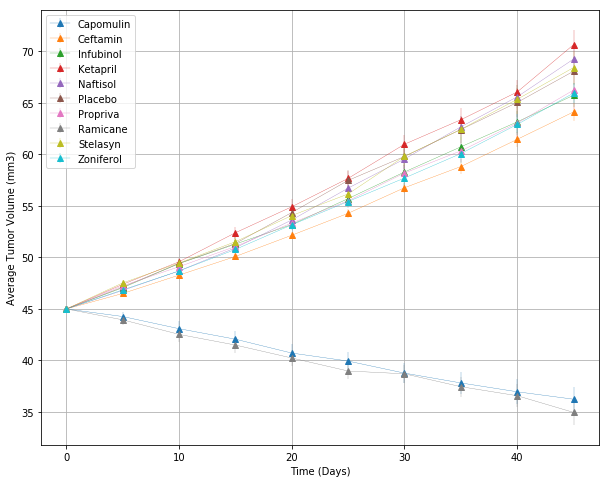

In [6]:
try:
    avg_tumor_volume.insert(3, "Tumor Volume (Standard Error)", sem)
except:
    print("The 'avg_tumor_volume' DataFrame already has a 'Standard Error' column.")

Capomulin = avg_tumor_volume[avg_tumor_volume.Drug == "Capomulin"]
Ceftamin = avg_tumor_volume[avg_tumor_volume.Drug == "Ceftamin"]
Infubinol = avg_tumor_volume[avg_tumor_volume.Drug == "Infubinol"]
Ketapril = avg_tumor_volume[avg_tumor_volume.Drug == "Ketapril"]
Naftisol = avg_tumor_volume[avg_tumor_volume.Drug == "Naftisol"]
Placebo = avg_tumor_volume[avg_tumor_volume.Drug == "Placebo"]
Propriva = avg_tumor_volume[avg_tumor_volume.Drug == "Propriva"]
Ramicane = avg_tumor_volume[avg_tumor_volume.Drug == "Ramicane"]
Stelasyn = avg_tumor_volume[avg_tumor_volume.Drug == "Stelasyn"]
Zoniferol = avg_tumor_volume[avg_tumor_volume.Drug == "Zoniferol"]

# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,8))

plt.errorbar(Capomulin["Timepoint"], Capomulin["Average Tumor Volume (mm3)"], yerr=Capomulin["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Ceftamin["Timepoint"], Ceftamin["Average Tumor Volume (mm3)"], yerr=Ceftamin["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Infubinol["Timepoint"], Infubinol["Average Tumor Volume (mm3)"], yerr=Infubinol["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Ketapril["Timepoint"], Ketapril["Average Tumor Volume (mm3)"], yerr=Ketapril["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Naftisol["Timepoint"], Naftisol["Average Tumor Volume (mm3)"], yerr=Naftisol["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Placebo["Timepoint"], Placebo["Average Tumor Volume (mm3)"], yerr=Placebo["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Propriva["Timepoint"], Propriva["Average Tumor Volume (mm3)"], yerr=Propriva["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Ramicane["Timepoint"], Ramicane["Average Tumor Volume (mm3)"], yerr=Ramicane["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Stelasyn["Timepoint"], Stelasyn["Average Tumor Volume (mm3)"], yerr=Stelasyn["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Zoniferol["Timepoint"], Zoniferol["Average Tumor Volume (mm3)"], yerr=Zoniferol["Tumor Volume (Standard Error)"], linewidth=0.3, marker='^')


plt.grid(True)
plt.xlabel("Time (Days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend(avg_tumor_volume.Drug.unique(), loc="upper left")

# Save the Figure
plt.savefig("Fig1.png")

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_1 = mice_trials.groupby(["Drug","Timepoint"])
samples_2 = [s for s in group_1["Metastatic Sites"]]

drug2 = [s[0][0] for s in samples_2]
timepoint2 = [s[0][1] for s in samples_2]
means2 = [s[1].mean() for s in samples_2]
sem2 = [s[1].sem() for s in samples_2]

# Convert to DataFrame
avg_met = pd.DataFrame({"Drug":drug2, "Timepoint":timepoint2, "Metastatic Sites (Average)":means2})

# Preview DataFrame
avg_met.head()

,Drug,Timepoint,Metastatic Sites (Average)
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
standard_error_met = pd.DataFrame({"Drug":drug2, "Timepoint":timepoint2, "Metastatic Sites (Standard Error)":sem2})

# Preview DataFrame
standard_error_met.head()

,Drug,Timepoint,Metastatic Sites (Standard Error)
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
standard_error_met_pivot = pd.pivot_table(standard_error_met, values="Metastatic Sites (Standard Error)", index="Timepoint", columns="Drug")

# Preview that Reformatting worked
standard_error_met_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


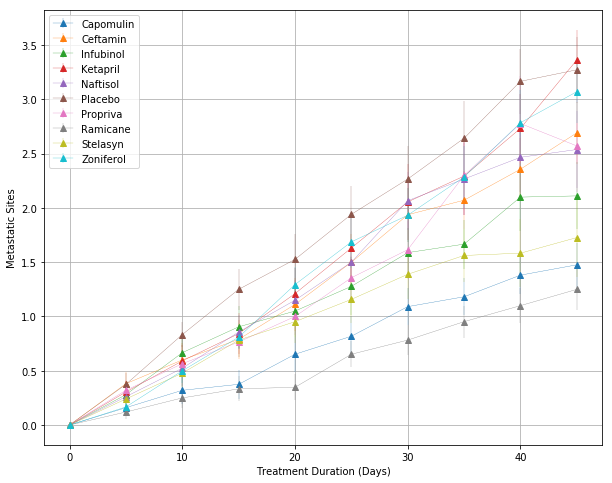

In [10]:
try:
    avg_met.insert(3, "Metastatic Sites (Standard Error)", sem2)
except:
    print("The 'avg_met' DataFrame already has a 'Standard Error' column.")

Capomulin = avg_met[avg_met.Drug == "Capomulin"]
Ceftamin = avg_met[avg_met.Drug == "Ceftamin"]
Infubinol = avg_met[avg_met.Drug == "Infubinol"]
Ketapril = avg_met[avg_met.Drug == "Ketapril"]
Naftisol = avg_met[avg_met.Drug == "Naftisol"]
Placebo = avg_met[avg_met.Drug == "Placebo"]
Propriva = avg_met[avg_met.Drug == "Propriva"]
Ramicane = avg_met[avg_met.Drug == "Ramicane"]
Stelasyn = avg_met[avg_met.Drug == "Stelasyn"]
Zoniferol = avg_met[avg_met.Drug == "Zoniferol"]

# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,8))

plt.errorbar(Capomulin["Timepoint"], Capomulin["Metastatic Sites (Average)"], yerr=Capomulin["Metastatic Sites (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Ceftamin["Timepoint"], Ceftamin["Metastatic Sites (Average)"], yerr=Ceftamin["Metastatic Sites (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Infubinol["Timepoint"], Infubinol["Metastatic Sites (Average)"], yerr=Infubinol["Metastatic Sites (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Ketapril["Timepoint"], Ketapril["Metastatic Sites (Average)"], yerr=Ketapril["Metastatic Sites (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Naftisol["Timepoint"], Naftisol["Metastatic Sites (Average)"], yerr=Naftisol["Metastatic Sites (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Placebo["Timepoint"], Placebo["Metastatic Sites (Average)"], yerr=Placebo["Metastatic Sites (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Propriva["Timepoint"], Propriva["Metastatic Sites (Average)"], yerr=Propriva["Metastatic Sites (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Ramicane["Timepoint"], Ramicane["Metastatic Sites (Average)"], yerr=Ramicane["Metastatic Sites (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Stelasyn["Timepoint"], Stelasyn["Metastatic Sites (Average)"], yerr=Stelasyn["Metastatic Sites (Standard Error)"], linewidth=0.3, marker='^')
plt.errorbar(Zoniferol["Timepoint"], Zoniferol["Metastatic Sites (Average)"], yerr=Zoniferol["Metastatic Sites (Standard Error)"], linewidth=0.3, marker='^')


plt.grid(True)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(avg_met.Drug.unique(), loc="upper left")

# Save the Figure
plt.savefig("Fig2.png")

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = group_1.count().reset_index()["Mouse ID"]

# Convert to DataFrame
mice_df = pd.DataFrame({"Drug":drug, "Timepoint": timepoint, "Mice":mice})

# Preview DataFrame
mice_df.head()

,Drug,Timepoint,Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mice_df_pivot = pd.pivot_table(mice_df, values="Mice", index="Timepoint", columns="Drug")
# Preview that Reformatting worked
mice_df_pivot
7,9,11,11,11,13,13,14,20,21

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


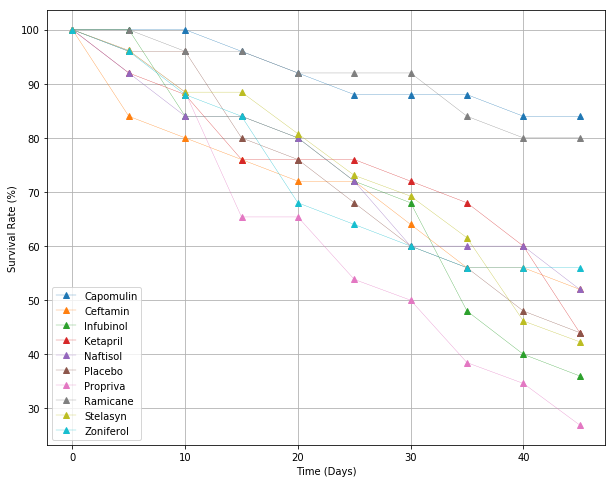

In [13]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,8))

plt.plot(100 * mice_df_pivot["Capomulin"] / 25, linewidth=0.3, marker='^')
plt.plot(100 * mice_df_pivot["Ceftamin"] / 25, linewidth=0.3, marker='^')
plt.plot(100 * mice_df_pivot["Infubinol"] / 25, linewidth=0.3, marker='^')
plt.plot(100 * mice_df_pivot["Ketapril"] / 25, linewidth=0.3, marker='^')
plt.plot(100 * mice_df_pivot["Naftisol"] / 25, linewidth=0.3, marker='^')
plt.plot(100 * mice_df_pivot["Placebo"] / 25, linewidth=0.3, marker='^')
plt.plot(100 * mice_df_pivot["Propriva"] / 26, linewidth=0.3, marker='^')
plt.plot(100 * mice_df_pivot["Ramicane"] / 25, linewidth=0.3, marker='^')
plt.plot(100 * mice_df_pivot["Stelasyn"] / 26, linewidth=0.3, marker='^')
plt.plot(100 * mice_df_pivot["Zoniferol"] / 25, linewidth=0.3, marker='^')


plt.grid(True)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(avg_met.Drug.unique(), loc="lower left")

# Save the Figure
plt.savefig("Fig3.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
list1 = list(avg_tumor_volume[(avg_tumor_volume.Drug == "Capomulin")]["Average Tumor Volume (mm3)"])
list2 = list(avg_tumor_volume[(avg_tumor_volume.Drug == "Ceftamin")]["Average Tumor Volume (mm3)"])
list3 = list(avg_tumor_volume[(avg_tumor_volume.Drug == "Infubinol")]["Average Tumor Volume (mm3)"])
list4 = list(avg_tumor_volume[(avg_tumor_volume.Drug == "Ketapril")]["Average Tumor Volume (mm3)"])
list5 = list(avg_tumor_volume[(avg_tumor_volume.Drug == "Naftisol")]["Average Tumor Volume (mm3)"])
list6 = list(avg_tumor_volume[(avg_tumor_volume.Drug == "Placebo")]["Average Tumor Volume (mm3)"])
list7 = list(avg_tumor_volume[(avg_tumor_volume.Drug == "Propriva")]["Average Tumor Volume (mm3)"])
list8 = list(avg_tumor_volume[(avg_tumor_volume.Drug == "Ramicane")]["Average Tumor Volume (mm3)"])
list9 = list(avg_tumor_volume[(avg_tumor_volume.Drug == "Stelasyn")]["Average Tumor Volume (mm3)"])
list10 = list(avg_tumor_volume[(avg_tumor_volume.Drug == "Zoniferol")]["Average Tumor Volume (mm3)"])

change1 = 100 * (list1[-1] - list1[0]) / list1[0]
change2 = 100 * (list2[-1] - list2[0]) / list2[0]
change3 = 100 * (list3[-1] - list3[0]) / list3[0]
change4 = 100 * (list4[-1] - list4[0]) / list4[0]
change5 = 100 * (list5[-1] - list5[0]) / list5[0]
change6 = 100 * (list6[-1] - list6[0]) / list6[0]
change7 = 100 * (list7[-1] - list7[0]) / list7[0]
change8 = 100 * (list8[-1] - list8[0]) / list8[0]
change9 = 100 * (list9[-1] - list9[0]) / list9[0]
change10 = 100 * (list10[-1] - list10[0]) / list10[0]

# Display the data to confirm
print("Drug")
for i in range(0,10):
    print(avg_met.Drug.unique()[i], "  ", eval("change" + str(i + 1)))

Drug
Capomulin    -19.47530266789416
Ceftamin    42.516491855897414
Infubinol    46.123471727851836
Ketapril    57.02879468660604
Naftisol    53.92334713476919
Placebo    51.29796048315153
Propriva    47.24117486320634
Ramicane    -22.32090046276666
Stelasyn    52.085134287898995
Zoniferol    46.57975086509522


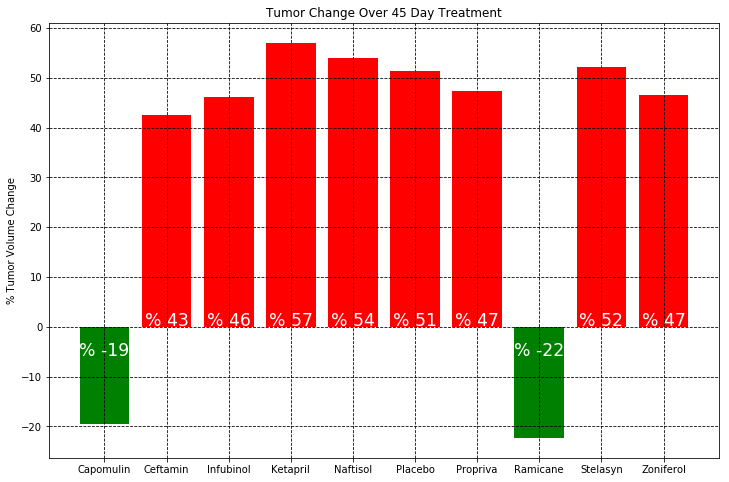

In [68]:
# Store all Relevant Percent Changes into a Tuple
tup = (change1, change2, change3, change4, change5, change6, change7, change8, change9, change10)

plt.figure(figsize=(12,8))
plt.bar(avg_met.Drug.unique(), tup, color=["g","r", "r", "r", "r", "r", "r", "g", "r", "r",])
plt.grid(True, color="black", linestyle="dashed")
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

def text(tup):
    for i in range(len(tup)):
        if tup[i] > 0:
            x = i
            label = "% " + str(round(tup[i]))
            plt.text(x, 3, label, ha='center', va='top', color="white", fontsize="xx-large")
        else:
            x = i
            label = "% " + str(round(tup[i]))
            plt.text(x, -3, label, ha='center', va='top', color="white", fontsize="xx-large")
text(tup)

# Save the Figure
plt.savefig("Fig4.png")